## This notebook is for researching betting opportunities based on my self-developing package 'football'.

# Settings

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Get data

In [6]:
# three seasons for training data
from football import datasets
df1 = datasets.load_EPL('2012-2013').data
df2 = datasets.load_EPL('2013-2014').data
df3 = datasets.load_EPL('2014-2015').data
df4 = datasets.load_EPL('2015-2016').data
# combine dataframes
df = pd.concat([df1,df2,df3,df4], ignore_index=True)
#df.Date = pd.to_datetime(df.Date, dayfirst=True).astype('datetime64[ns]')

In [167]:
# new team entering df4 didn't appear in df1,df2,df3
oldTeams = df1.HomeTeam.tolist()+df2.HomeTeam.tolist()+df3.HomeTeam.tolist()
newTeam = [t for t in df4.HomeTeam.unique().tolist() if t not in oldTeams]
newTeam

['Bournemouth', 'Watford']

In [168]:
# this team's every match
df4[(df4.HomeTeam=='Watford').values | (df4.AwayTeam=='Watford').values]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
2,E0,2015-08-08,Everton,Watford,2,2,D,0,1,A,...,1.93,1.84,2.03,1.96,26,-1.00,2.28,2.18,1.76,1.71
15,E0,2015-08-15,Watford,West Brom,0,0,D,0,0,D,...,2.22,2.12,1.78,1.71,27,-0.25,1.96,1.91,2.01,1.94
27,E0,2015-08-23,Watford,Southampton,0,0,D,0,0,D,...,2.20,2.13,1.78,1.70,27,0.00,1.96,1.91,1.99,1.93
34,E0,2015-08-29,Man City,Watford,2,0,H,0,0,D,...,1.40,1.37,3.15,2.98,26,-2.00,1.95,1.90,2.00,1.95
45,E0,2015-09-12,Watford,Swansea,1,0,H,0,0,D,...,2.24,2.13,1.76,1.70,24,0.00,1.95,1.89,2.01,1.95
54,E0,2015-09-19,Newcastle,Watford,1,2,A,0,2,A,...,2.25,2.17,1.74,1.68,25,0.00,1.81,1.76,2.20,2.11
68,E0,2015-09-27,Watford,Crystal Palace,0,1,A,0,0,D,...,2.20,2.13,1.76,1.71,25,0.00,1.78,1.75,2.21,2.13
71,E0,2015-10-03,Bournemouth,Watford,1,1,D,1,1,D,...,2.07,2.00,1.91,1.80,27,-0.50,2.13,2.08,1.85,1.79
86,E0,2015-10-17,Watford,Arsenal,0,3,A,0,0,D,...,1.79,1.72,2.23,2.10,28,1.00,1.91,1.86,2.06,2.00
94,E0,2015-10-24,Stoke,Watford,0,2,A,0,1,A,...,2.40,2.31,1.67,1.61,23,-0.50,2.11,2.06,1.85,1.81


In [6]:
# round 1
_t = np.arange(9, len(df.Date),10)[0]
df.ix[0:_t,]

,AC,AF,AR,AS,AST,AY,AwayTeam,B365A,B365D,B365H,...,Referee,SJA,SJD,SJH,VCA,VCD,VCH,WHA,WHD,WHH
0,0,8,0,3,2,0,Sunderland,8.50,4.50,1.40,...,NaN,9.50,4.5,1.36,8.50,4.75,1.44,8.00,4.0,1.44
1,3,11,0,4,2,0,Norwich,4.50,3.60,1.80,...,NaN,4.50,3.6,1.80,4.75,3.75,1.83,4.50,3.3,1.85
2,5,8,0,12,6,2,Tottenham,2.75,3.40,2.50,...,NaN,2.80,3.4,2.50,2.75,3.40,2.62,2.80,3.0,2.70
3,3,14,0,12,8,2,Swansea,3.80,3.40,2.00,...,NaN,3.60,3.3,2.10,4.00,3.50,2.00,3.80,3.3,2.00
4,3,14,1,6,3,4,Stoke,3.10,3.25,2.38,...,NaN,3.00,3.2,2.40,3.25,3.30,2.40,2.90,3.3,2.40
5,3,11,1,14,7,4,Liverpool,1.91,3.50,4.20,...,NaN,1.91,3.4,4.00,1.95,3.60,4.33,2.00,3.3,3.80
6,4,8,0,10,6,1,Aston Villa,3.40,3.30,2.20,...,NaN,3.30,3.3,2.25,3.40,3.40,2.25,3.20,3.2,2.30
7,3,6,0,9,6,2,Southampton,17.00,7.00,1.17,...,NaN,19.00,7.0,1.17,19.00,7.00,1.20,15.00,6.0,1.20
8,1,11,0,5,3,2,Chelsea,1.62,3.75,6.00,...,NaN,1.53,4.0,6.50,1.65,3.80,6.50,1.67,3.6,5.50
9,8,11,0,12,7,2,Man United,1.83,3.60,4.33,...,NaN,1.91,3.5,4.00,1.87,3.70,4.30,1.91,3.3,4.33


# Parameter Estimation

In [3]:
from football.parameter_estimation import ParamLoad, ParamEstimate, ParamStored

In [8]:
# check which rounds are stored
ParamStored('single')

['18-08-2015',
 '11-08-2015',
 '15-09-2015',
 '25-08-2015',
 '29-09-2015',
 '01-09-2015',
 '04-10-2015',
 '21-09-2015']

In [4]:
date = '26/10/2015'
ksi = 0.005

>full time, first half, second half

In [10]:
# run estimation if not yet stored
ParamEstimate(df, date, ksi)

  NIT    FC           OBJFUN            GNORM
    1    57     2.373836E+03     1.080227E+03
    2   115     1.532948E+03     1.509015E+02
    3   173     1.468880E+03     9.953578E+01
    4   231     1.440657E+03     6.194063E+01
    5   289     1.433499E+03     6.114962E+01
    6   348     1.429940E+03     4.471267E+01
    7   407     1.426824E+03     4.016945E+01
    8   466     1.423286E+03     2.686493E+01
    9   525     1.421001E+03     2.840616E+01
   10   584     1.419929E+03     2.158370E+01
   11   643     1.419402E+03     2.641893E+01
   12   702     1.419086E+03     1.966721E+01
   13   761     1.418697E+03     2.218797E+01
   14   820     1.418361E+03     1.741002E+01
   15   879     1.418063E+03     1.822355E+01
   16   938     1.417874E+03     1.602335E+01
   17   996     1.417594E+03     1.358175E+01
   18  1055     1.417332E+03     9.649314E+00
   19  1114     1.417215E+03     8.687039E+00
   20  1173     1.417144E+03     8.222335E+00
   21  1232     1.417088E+03     7

In [7]:
# load it if already stored
full_model, first_model, second_model = ParamLoad(df, date, ksi)

Loading completed.
Loading completed.
Loading completed.


# Inference

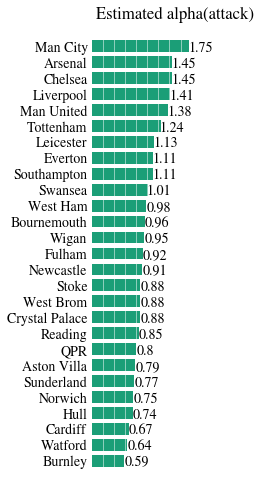

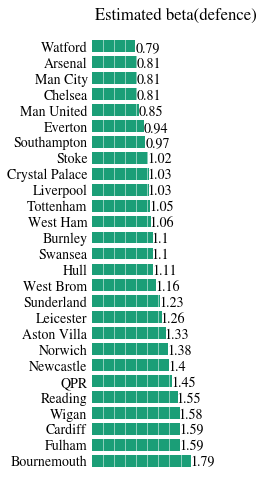

In [8]:
# full_model, first_model or second_model
full_model.plot_estimated_parameters('alpha(attack)')
full_model.plot_estimated_parameters('beta(defence)')

/home/endi/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


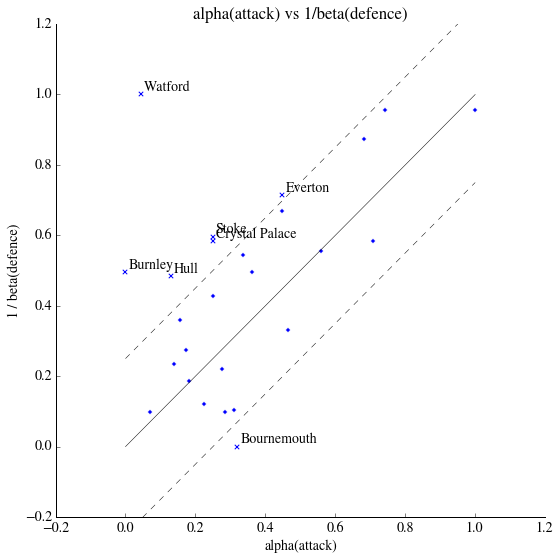

In [13]:
full_model.plot_alpha_vs_beta(clean=True)

### match between 

In [784]:
home,away = 'Tottenham', 'Aston Villa'

full_model.goals_statistics(home, away, detail=False)

Tottenham ,  Aston Villa
goals scored:  [195, 126]
goals conceded:  [158, 204]


In [785]:
# simulate 1000 matches between them
results = second_model.simulate_match_result(home, away, times=1000)
outcomes = {home:0, 'Draw':0, away:0}
for i,j in results:
    if i>j:
        outcomes[home] += 1
    elif i==j:
        outcomes['Draw'] += 1
    else:
        outcomes[away] += 1
print 
print 'outcomes of 1000 simulations: ', outcomes

Tottenham expected goals vs Aston Villa expected goals
1.32 : 0.35


Simulated match 1:
Tottenham vs Aston Villa
2 : 0
Simulated match 2:
Tottenham vs Aston Villa
0 : 0
Simulated match 3:
Tottenham vs Aston Villa
1 : 1
Simulated match 4:
Tottenham vs Aston Villa
0 : 1
Simulated match 5:
Tottenham vs Aston Villa
1 : 1
Simulated match 6:
Tottenham vs Aston Villa
0 : 1
Simulated match 7:
Tottenham vs Aston Villa
2 : 0
Simulated match 8:
Tottenham vs Aston Villa
0 : 1
Simulated match 9:
Tottenham vs Aston Villa
1 : 2
Simulated match 10:
Tottenham vs Aston Villa
3 : 0
Simulated match 11:
Tottenham vs Aston Villa
1 : 1
Simulated match 12:
Tottenham vs Aston Villa
3 : 0
Simulated match 13:
Tottenham vs Aston Villa
1 : 0
Simulated match 14:
Tottenham vs Aston Villa
4 : 1
Simulated match 15:
Tottenham vs Aston Villa
4 : 1
Simulated match 16:
Tottenham vs Aston Villa
0 : 0
Simulated match 17:
Tottenham vs Aston Villa
3 : 0
Simulated match 18:
Tottenham vs Aston Villa
1 : 0
Simulated match 19:
To

#Dynamical parameter estimation for each week in a whole season

In [1]:
from football.parameter_estimation import ParamStored, ParamDynamic

In [5]:
ParamStored('season')

[]

In [11]:
ParamDynamic?

# Calculating probabilities for various outcomes

In [9]:
from football.betting_strategy import Betting

>full time

In [10]:
# instantiate prob
df, date, ksi, estimated_params, estimated_gamma = full_model.df, full_model.date, full_model.ksi,\
                                                   full_model.estimated_params, full_model.estimated_gamma
df, date, ksi, estimated_params_1, estimated_gamma_1 = first_model.df, first_model.date, first_model.ksi,\
                                                   first_model.estimated_params, first_model.estimated_gamma
df, date, ksi, estimated_params_2, estimated_gamma_2 = second_model.df, second_model.date, second_model.ksi,\
                                                   second_model.estimated_params, second_model.estimated_gamma

prob = Betting(df, date, ksi, estimated_params, estimated_gamma, estimated_params_1, estimated_gamma_1, estimated_params_2, estimated_gamma_2)


In [11]:
prob.play

['FULL TIME RESULT',
 'DOUBLE CHANCE',
 'CORRECT SCORE',
 'GOALS OVER/UNDER',
 'TEAMS TO SCORE',
 'BOTH TEAMS TO SCORE',
 'RESULT/BOTH TEAMS TO SCORE',
 'RESULT/TOTAL GOALS',
 'TOTAL GOALS/BOTH TEAMS TO SCORE',
 'EXACT TOTAL GOALS',
 'NUMBER OF GOALS IN MATCH',
 'TEAM TOTAL GOALS',
 'HOME TEAM EXACT GOALS',
 'AWAY TEAM EXACT GOALS',
 'GOALS ODD/EVEN',
 'GOAL LINE',
 'ASIAN HANDICAP']

In [12]:
# full time plays
home,away = 'Tottenham', 'Aston Villa'

prob.full_time_result(home, away,'ASIAN HANDICAP')


,"Aston Villa[>,=]","Tottenham[>,=]"
-5.0,"[0.0, 0.0002]","[0.0119, 0.0252]"
-4.5,"[0.0003, 0.0]","[0.0371, 0.0]"
-4.0,"[0.0003, 0.0014]","[0.0371, 0.0625]"
-3.5,"[0.0017, 0.0]","[0.0997, 0.0]"
-3.0,"[0.0017, 0.0076]","[0.0997, 0.1274]"
-2.5,"[0.0093, 0.0]","[0.2271, 0.0]"
-2.0,"[0.0093, 0.031]","[0.2271, 0.204]"
-1.5,"[0.0403, 0.0]","[0.4311, 0.0]"
-1.0,"[0.0403, 0.0941]","[0.4311, 0.2415]"
-0.5,"[0.1344, 0.0]","[0.6725, 0.0]"


**The summation of probs of the three outcomes of a match is equal to 1 by the model, however on bookmakers' side, the summation of their probs(1/odds) is usually within the range of (100%, 110%)>100%, which is called overround.
And the extra (0%, 10%) is allocated to the three outcomes according to the proportion of bettors' bets.**

Modify the Betting class by using decorator to transform odds to probabilities.

>half time

In [13]:
prob.play_half

['HALF TIME RESULT',
 'HALF TIME DOUBLE CHANCE',
 'HALF TIME RESULT/BOTH TEAMS TO SCORE',
 'HALF TIME RESULT/TOTAL GOALS',
 'HALF TIME CORRECT SCORE',
 'BOTH TEAMS TO SCORE IN 1ST HALF',
 'BOTH TEAMS TO SCORE IN 2ND HALF',
 'BOTH TEAMS TO SCORE 1ST HALF - 2ND HALF',
 '1ST HALF GOAL LINE',
 '1ST HALF ASIAN HANDICAP',
 'FIRST HALF GOALS',
 'EXACT 1ST HALF GOALS',
 '1ST/2ND HALF GOALS ODD/EVEN',
 'TO WIN EITHER HALF',
 'TO WIN BOTH HALVES',
 'TO SCORE IN BOTH HALVES',
 'HOME TEAM TO SCORE IN 1ST HALF',
 'AWAY TEAM TO SCORE IN 1ST HALF',
 'HOME TEAM TO SCORE IN 2ND HALF',
 'AWAY TEAM TO SCORE IN 2ND HALF',
 'HALF WITH MOST GOALS',
 '2ND HALF RESULT',
 '2ND HALF GOALS',
 'EXACT 2ND HALF GOALS',
 'HOME TEAM HIGHEST SCORING HALF',
 'AWAY TEAM HIGHEST SCORING HALF']

In [14]:
# half time plays
prob.half_time_result(home, away, 'HALF TIME RESULT')


{'Aston Villa': 0.2067, 'Draw': 0.397, 'Tottenham': 0.3964}

## This section is to create a live Session for in-play betting, could be added into the package later.

In [99]:
import datetime

class inplay(object):
    '''

    date1 = '15:00:00 31/10/2015'
    date2 = '15:44:02 31/10/2015'
    t1 = datetime.datetime.strptime(date1, '%H:%M:%S %d/%m/%Y')
    t2 = datetime.datetime.strptime(date2, '%H:%M:%S %d/%m/%Y')
    dif = t2-t1
    dif.seconds

    --------------------------------------------------------------
    Example:

    home,away = 'Tottenham', 'Aston Villa'
    run = inplay(home, away, 2015, 11, 2, 20, 0)

    run.update_odds(minute=1, H=1.40, D=5.00, A=9.00)
    run.update_odds(minute=5, H=1.80, D=2.90, A=9.50)
    run.update_odds(minute=10, H=1.90, D=2.50, A=10.00)
    run.update_odds(minute=15, H=2.00, D=2.30, A=10.50)
    run.update_odds(minute=20, H=2.20, D=2.00, A=9.00)
    run.update_odds(minute=25, H=2.20, D=2.00, A=9.00)

    run.place_bet(10.0, 0.0, 0.0)
    #run.remove_bet()
    print '--------------------------------------------'

    #1-0
    run.update_odds(minute=35, H=1.20, D=6.50, A=11.50)
    run.update_odds(minute=40, H=1.15, D=6.80, A=12.00)
    run.update_odds(minute=45, H=1.15, D=6.90, A=18.50)
    run.update_odds(minute=60, H=1.10, D=7.50, A=20.00)

    run.place_bet(0.0, 2.0, 1.0)
    #run.remove_bet()
    print '--------------------------------------------'


    #2-0
    run.update_odds(minute=75, H=1.02, D=15.00, A=30.00)
    run.update_odds(minute=80, H=1.01, D=16.00, A=40.00)

    run.place_bet(0.0, 0.5, 0.0)
    #run.remove_bet()
    print '--------------------------------------------'

    run.history



    '''
    
    def __init__(self, home, away, *args):
        self.home = home
        self.away = away
        self.datetime = datetime.datetime(*args)
        self.minute = 0
        self.history = pd.DataFrame({'minute':np.array([0]), \
                                     'odds_H':np.array([0.0]), \
                                     'odds_D':np.array([0.0]), \
                                     'odds_A':np.array([0.0]), \
                                     'odds_HD':np.array([0.0]), \
                                     'odds_HA':np.array([0.0]), \
                                     'odds_DA':np.array([0.0]), \
                                     'stake_H':np.array([0.0]), \
                                     'stake_D':np.array([0.0]), \
                                     'stake_A':np.array([0.0]), \
                                     'stake_HD':np.array([0.0]), \
                                     'stake_HA':np.array([0.0]), \
                                     'stake_DA':np.array([0.0]), \
                                     'return_H':np.array([0.0]), \
                                     'return_D':np.array([0.0]), \
                                     'return_A':np.array([0.0]) \
                                    }, columns=['minute','odds_H','odds_D','odds_A','odds_HD','odds_HA','odds_DA',\
                                               'stake_H','stake_D','stake_A','stake_HD','stake_HA','stake_DA',\
                                               'return_H','return_D','return_A'])
        self.count_bets = 0
        #self.count_odds = 0
        self.begin = False
        # .append('bet365 10 pounds')
        self.bookmakers = []
        #side, odds, stake
        self.current_bet = [[],[],[]]


    def update_odds(self, minute, H, D, A, HD, HA, DA):
        '''

        Currently manually input best odds from five bookmakers.
        Need to crawl dynamic odds from bookmakers' in-play pages.

        '''
        #i = self.count_odds
        #add 1 minute
        #self.minute += datetime.timedelta(seconds=60)

        if not self.begin:
            i = 0
            self.begin = True
        else:
            i = self.history.index[-1]+1

        self.history.loc[i, 'minute'] = minute
        self.history.loc[i, 'odds_H'] = H
        self.history.loc[i, 'odds_D'] = D
        self.history.loc[i, 'odds_A'] = A
        self.history.loc[i, 'odds_HD'] = HD
        self.history.loc[i, 'odds_HA'] = HA
        self.history.loc[i, 'odds_DA'] = DA
        self.history.loc[i, 'stake_H'] = 0.0
        self.history.loc[i, 'stake_D'] = 0.0
        self.history.loc[i, 'stake_A'] = 0.0
        self.history.loc[i, 'stake_HD'] = 0.0
        self.history.loc[i, 'stake_HA'] = 0.0
        self.history.loc[i, 'stake_DA'] = 0.0
        self.history.loc[i, 'return_H'] = 0.0
        self.history.loc[i, 'return_D'] = 0.0
        self.history.loc[i, 'return_A'] = 0.0
        #self.count_odds += 1

        return None


    def place_bet(self, stake_H, stake_D, stake_A, stake_HD, stake_HA, stake_DA, confirm=False):
        N = self.history.index[-1]

        #get odds(for convenience)
        H = self.history.loc[N, 'odds_H']
        D = self.history.loc[N, 'odds_D']
        A = self.history.loc[N, 'odds_A']
        HD = self.history.loc[N, 'odds_HD']
        HA = self.history.loc[N, 'odds_HA']
        DA = self.history.loc[N, 'odds_DA']
        #place stakes into the self.history
        self.history.loc[N, 'stake_H'] = stake_H
        self.history.loc[N, 'stake_D'] = stake_D
        self.history.loc[N, 'stake_A'] = stake_A
        self.history.loc[N, 'stake_HD'] = stake_HD
        self.history.loc[N, 'stake_HA'] = stake_HA
        self.history.loc[N, 'stake_DA'] = stake_DA
        #calculate return on this bet
        stakes=stake_H+stake_D+stake_A+stake_HD+stake_HA+stake_DA
        self.history.loc[N, 'return_H'] = H*stake_H + HD*stake_HD + HA*stake_HA - stakes
        self.history.loc[N, 'return_D'] = D*stake_D + HD*stake_HD + DA*stake_DA - stakes
        self.history.loc[N, 'return_A'] = A*stake_A + HA*stake_HA + DA*stake_DA - stakes


        if confirm:
            #modify self.current_bet
            _bin = [(H, self.home, stake_H), \
                    (D, 'draw', stake_D), \
                    (A, self.away, stake_A), \
                    (HD, self.home+' draw', stake_HD), \
                    (HA, self.home+' '+self.away, stake_HA), \
                    (DA, 'draw '+self.away, stake_DA) \
                   ]
            for i in range(6):
                if [stake_H, stake_D, stake_A, stake_HD, stake_HA, stake_DA][i] > 0:
                    self.current_bet[0].append(_bin[i][1])
                    self.current_bet[1].append(_bin[i][0])
                    self.current_bet[2].append(_bin[i][2])
            #self.count_bets += 1


        profit = [0.0, 0.0, 0.0]
        stakepool = 0.0
        for i in self.history.index:
            if self.history.loc[i, 'stake_H'] > 0 or self.history.loc[i, 'stake_D'] > 0 or self.history.loc[i, 'stake_A'] > 0 \
            or self.history.loc[i, 'stake_HD'] > 0 or self.history.loc[i, 'stake_HA'] > 0 or self.history.loc[i, 'stake_DA'] > 0:
                profit[0] += self.history.loc[i, 'return_H']
                profit[1] += self.history.loc[i, 'return_D']
                profit[2] += self.history.loc[i, 'return_A']
                stakepool += (self.history.loc[i, 'stake_H'] + self.history.loc[i, 'stake_D'] + self.history.loc[i, 'stake_A'] + \
                             self.history.loc[i, 'stake_HD'] + self.history.loc[i, 'stake_HA'] + self.history.loc[i, 'stake_DA'])

        print 'stakes: '+str(stakepool)+'\n'
        print 'Profit:\n'
        print self.home, profit[0]
        print 'draw ', profit[1]
        print self.away, profit[2]

        return None


    def current_bet_report(self):
        print 'Bet details:\n'
        print 'side, odds, stake'
        for j in range(len(self.current_bet[0])):
            print self.current_bet[0][j], self.current_bet[1][j], self.current_bet[2][j]
        print '--------------------------------------\n'

        print 'Bet result:\n'
        profit = [0.0, 0.0, 0.0]
        stakepool = 0.0
        for i in self.history.index:
            if self.history.loc[i, 'stake_H'] > 0 or self.history.loc[i, 'stake_D'] > 0 or self.history.loc[i, 'stake_A'] > 0 \
            or self.history.loc[i, 'stake_HD'] > 0 or self.history.loc[i, 'stake_HA'] > 0 or self.history.loc[i, 'stake_DA'] > 0:
                profit[0] += self.history.loc[i, 'return_H']
                profit[1] += self.history.loc[i, 'return_D']
                profit[2] += self.history.loc[i, 'return_A']
                stakepool += (self.history.loc[i, 'stake_H'] + self.history.loc[i, 'stake_D'] + self.history.loc[i, 'stake_A'] + \
                             self.history.loc[i, 'stake_HD'] + self.history.loc[i, 'stake_HA'] + self.history.loc[i, 'stake_DA'])

        print 'stakes: '+str(stakepool)+'\n'
        print 'Profit:\n'
        print self.home, profit[0]
        print 'draw ', profit[1]
        print self.away, profit[2]

        return None


    def remove_bet(self, row=None):
        '''
        --------------------------------------
        Parameters:

        row:None, remove the last bet;
            int, remove bet of the row index

        '''
        if row != None:
            i = row
        else:
            i = self.history.index[-1]
        self.history.loc[i, 'stake_H'] = 0.0
        self.history.loc[i, 'stake_D'] = 0.0
        self.history.loc[i, 'stake_A'] = 0.0
        self.history.loc[i, 'stake_HD'] = 0.0
        self.history.loc[i, 'stake_HA'] = 0.0
        self.history.loc[i, 'stake_DA'] = 0.0
        self.history.loc[i, 'return_H'] = 0.0
        self.history.loc[i, 'return_D'] = 0.0
        self.history.loc[i, 'return_A'] = 0.0
        print 'Warning: self.current_bet to be modified...'
        return None


    def remove_rows(self, row=None):
        '''
        --------------------------------------
        Parameters:

        row:None, remove the last row;
            list, [5,7,8], remove duplicate rows

        '''
        if type(row) == list:
            i = row
        else:
            i = self.history.index[-1]

        self.history.drop(row, inplace=True)
        self.history.reset_index(drop=True, inplace=True)
        print 'Warning: Be careful about removing rows from self.history'
        return None


    def save_history(self, outcome):
        '''
        ----------------------------------
        Parameters:

        outcome:tuple, e.g. (1,3)
        '''
        if type(outcome) != tuple or len(outcome) != 2:
            raise ValueError('Input must be a tuple (1,3)')

        _outcome = str(outcome[0])+'-'+str(outcome[1])
        filename = self.datetime.strftime("%Y-%m-%d")+' '+self.home+'-'+self.away+' '+_outcome+'.csv'

        if outcome[0] > outcome[1]:
            cat = 'home win'
        elif outcome[0] == outcome[1]:
            cat = 'draw'
        else:
            cat = 'away win'
        path = '/home/endi/Desktop/Betting File/history/'+cat+'/'
        self.history.to_csv(path+filename)
        print 'bet history saved to ',path+filename
        return None

In [115]:
home,away = 'Real Madrid', 'PSG'
run = inplay(home, away, 2015, 11, 3, 19, 45)

In [116]:
run.update_odds(minute=10, H=1.8, D=3.5, A=4.5, HD=1.28, HA=1.4, DA=2.25)
run.place_bet(stake_H=10.0, stake_D=0.0, stake_A=0.0, stake_HD=0.0, stake_HA=0.0, stake_DA=0.0, confirm=True)
# 1-0
run.update_odds(minute=70, H=1.1, D=15.0, A=41.0, HD=1.025, HA=1.07, DA=11)

#run.remove_bet(row=[5])
#run.remove_rows([8])
run.history

stakes: 10.0

Profit:

Real Madrid 8.0
draw  -10.0
PSG -10.0


,minute,odds_H,odds_D,odds_A,odds_HD,odds_HA,odds_DA,stake_H,stake_D,stake_A,stake_HD,stake_HA,stake_DA,return_H,return_D,return_A
0,10,1.8,3.5,4.5,1.280,1.40,2.25,10,0,0,0,0,0,8,-10,-10
1,70,1.1,15.0,41.0,1.025,1.07,11.00,0,0,0,0,0,0,0,0,0


In [117]:
run.current_bet_report()

Bet details:

side, odds, stake
Real Madrid 1.8 10.0
--------------------------------------

Bet result:

stakes: 10.0

Profit:

Real Madrid 8.0
draw  -10.0
PSG -10.0


In [118]:
run.save_history((1,0))

bet history saved to  /home/endi/Desktop/Betting File/history/home win/2015-11-03 Real Madrid-PSG 1-0.csv


### useful functions to calculate hedge betting

In [119]:
# Solve the system of equations:
# H*x0 - DA*x1 = 0
# x0 + x1 = total_stake

H = 1.8
DA = 11
total_stake = 10
a = np.array([[H,-DA], [1,1]])
b = np.array([0,total_stake])
x = np.linalg.solve(a, b)

print home, x[0]
print 'draw or '+away, x[1]
print 
print 'check solution: ', np.allclose(np.dot(a, x), b)
print 
print 'Profit: ', H*x[0]-sum(x)

Real Madrid 8.59375
draw or PSG 1.40625

check solution:  True

Profit:  5.46875


In [120]:
# Solve the system of equations:
# H*x0 - D*x1 = 0
# H*x0 - A*x2 = 0
# x0 + x1 + x2 = total_stake

H,D,A = 1.25, 6.9, 21.0


total_stake = 1000
a = np.array([[H,-D,0], [H,0,-A], [1,1,1]])
b = np.array([0,0,total_stake])
x = np.linalg.solve(a, b)

print 'home win', x[0]
print 'draw', x[1]
print 'away win', x[2]
print 
print 'check solution: ', np.allclose(np.dot(a, x), b)
print 
print 'Profit: ', H*x[0]-sum(x)
print '----------------------------------------------------------'

home win 806.007509387
draw 146.01585315
away win 47.9766374635

check solution:  True

Profit:  7.50938673342
----------------------------------------------------------


In [121]:
# prevent bookmakers' restriction on placing bets
H_stake = 88
D_stake = 16.5
A_stake = 5.5
total_stake = H_stake + D_stake + A_stake
print 'real stakes: ', H_stake, D_stake, A_stake
print H_stake*H - total_stake, D_stake*D - total_stake, A_stake*A - total_stake

real stakes:  88 16.5 5.5
0.0 3.85 5.5


## In-play betting, researching on the goal scoring times

The bookmakers are calculating the odds while the match is ongoing and any goal will change the probabilities of match outcomes so the odds is changing.

Crawl the odds dynamically like what I did in the YahooFinance project...e.g. from Ladbrokes site.

The aim of in-play betting is to buy this team and before it scores a goal and lead the game.

In [79]:
# three seasons for training data
from football import datasets
df1 = datasets.load_EPL('2005-2006').load_goal_times()
df2 = datasets.load_EPL('2006-2007').load_goal_times()
df3 = datasets.load_EPL('2007-2008').load_goal_times()
df4 = datasets.load_EPL('2008-2009').load_goal_times()
df5 = datasets.load_EPL('2009-2010').load_goal_times()
df6 = datasets.load_EPL('2010-2011').load_goal_times()
df7 = datasets.load_EPL('2011-2012').load_goal_times()
df8 = datasets.load_EPL('2012-2013').load_goal_times()
df9 = datasets.load_EPL('2013-2014').load_goal_times()
df10 = datasets.load_EPL('2014-2015').load_goal_times()
df11 = datasets.load_EPL('2015-2016').load_goal_times()

In [80]:
# combine dataframes
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11], ignore_index=True)
df.Date = pd.to_datetime(df.Date, dayfirst=True).astype('datetime64[ns]')

### 

In [88]:
home = 'Liverpool'
away = 'Crystal Palace'
df_home = df[(df.Home == home) | (df.Away == home)]
df_home.reset_index(drop=True, inplace=True)

In [89]:
df_home.head(5)

,Date,Home,Away,FTHG,FTAG,1 goal,2 goal,3 goal,4 goal,5 goal,6 goal,7 goal,8 goal,9 goal,10 goal,11 goal,12 goal
0,2005-08-13,Middlesbrough,Liverpool,0,0,,,,,,,,,,,,
1,2005-08-20,Liverpool,Sunderland,1,0,"(24, 0, Xabi Alonso)",,,,,,,,,,,
2,2005-09-10,Tottenham Hotspur,Liverpool,0,0,,,,,,,,,,,,
3,2005-09-18,Liverpool,Manchester United,0,0,,,,,,,,,,,,
4,2005-09-24,Birmingham City,Liverpool,2,2,"(68, 1, Luis Garcia)","(72, 0, Stephen Warnock)","(75, 0, Walter Pandiani)","(85, 1, Djibril Cisse)",,,,,,,,


In [90]:
df_away = df[(df.Home==away) | (df.Away==away)]
df_away.reset_index(drop=True, inplace=True)

In [91]:
df_away.head(5)

,Date,Home,Away,FTHG,FTAG,1 goal,2 goal,3 goal,4 goal,5 goal,6 goal,7 goal,8 goal,9 goal,10 goal,11 goal,12 goal
0,2013-08-18,Crystal Palace,Tottenham Hotspur,0,1,"(50, 1, Roberto Soldado)",,,,,,,,,,,
1,2013-08-24,Stoke City,Crystal Palace,2,1,"(31, 1, Marouane Chamakh)","(58, 0, Charlie Adam)","(62, 0, Ryan Shawcross)",,,,,,,,,
2,2013-08-31,Crystal Palace,Sunderland,3,1,"(9, 0, Danny Gabbidon)","(64, 1, Steven Fletcher)","(79, 0, Dwight Gayle)","(90, 0, Stuart O'Keefe)",,,,,,,,
3,2013-09-14,Manchester United,Crystal Palace,2,0,"(45, 0, Robin Van Persie)","(81, 0, Wayne Rooney)",,,,,,,,,,
4,2013-09-22,Crystal Palace,Swansea City,0,2,"(2, 1, Michu)","(48, 1, Nathan Dyer)",,,,,,,,,,


### plot the distribution of goal times

In [92]:
# grab goal minutes for two teams

minutes_bymatch_home = []

for i in df_home.index:
    if df_home.loc[i, 'Home'] == home:
        side = 0
    elif df_home.loc[i, 'Away'] == home:
        side = 1
    else:
        raise ValueError('Wrong goal_times...')
    goals = []
    for goal in df_home.loc[i, df_home.columns[5:]]:
        if len(goal)>0 and goal[1]==side:
            goals.append(goal[0])
    minutes_bymatch_home.append(goals)


minutes_bymatch_away = []

for i in df_away.index:
    if df_away.loc[i, 'Home'] == away:
        side = 0
    elif df_away.loc[i, 'Away'] == away:
        side = 1
    else:
        raise ValueError('Wrong goal_times...')
    goals = []
    for goal in df_away.loc[i, df_away.columns[5:]]:
        if len(goal)>0 and goal[1]==side:
            goals.append(goal[0])
    minutes_bymatch_away.append(goals)

In [93]:
# squeeze out goal minutes from all matches
minutes_home = [t for match in minutes_bymatch_home for t in match] #great list comprehension
minutes_away = [t for match in minutes_bymatch_away for t in match]

Total goals in 387 matches:

Liverpool:  656
Crystal Palace:  89


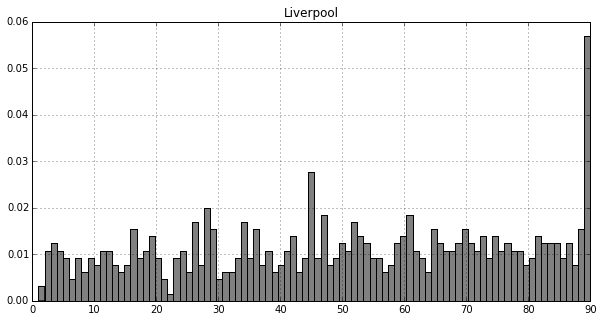

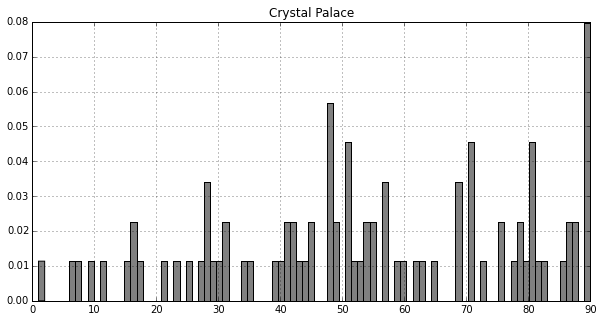

In [94]:
print 'Total goals in',len(minutes_bymatch_home), 'matches:\n'
print home+': ', len(minutes_home)
print away+': ', len(minutes_away)
fig = plt.figure(figsize=(10,5))
plt.title(home)
plt.xlim(0,90)
plt.hist(minutes_home, bins=90, normed=True, color='grey') #bins=90 means 90 minutes
plt.grid()

fig = plt.figure(figsize=(10,5))
plt.title(away)
plt.xlim(0,90)
plt.hist(minutes_away, bins=90, normed=True, color='grey')
plt.grid()

### home vs. away history performances

In [95]:
df_vs = df_home[ (df_home.Home==away) | (df_home.Away==away) ]
df_vs.reset_index(drop=True, inplace=True)

In [96]:
df_vs[-10:]

,Date,Home,Away,FTHG,FTAG,1 goal,2 goal,3 goal,4 goal,5 goal,6 goal,7 goal,8 goal,9 goal,10 goal,11 goal,12 goal
0,2013-10-05,Liverpool,Crystal Palace,3,1,"(13, 0, Luis Suarez)","(17, 0, Daniel Sturridge)","(38, 0, Steven Gerrard)","(76, 1, Dwight Gayle)",,,,,,,,
1,2014-05-05,Crystal Palace,Liverpool,3,3,"(18, 1, Joe Allen)","(53, 1, Damien Delaney)","(55, 1, Luis Suarez)","(79, 0, Damien Delaney)","(81, 0, Dwight Gayle)","(88, 0, Dwight Gayle)",,,,,,
2,2014-11-23,Crystal Palace,Liverpool,3,1,"(2, 1, Rickie Lambert)","(17, 0, Dwight Gayle)","(78, 0, Joe Ledley)","(81, 0, Mile Jedinak)",,,,,,,,
3,2015-05-16,Liverpool,Crystal Palace,1,3,"(26, 0, Adam Lallana)","(43, 1, Jason Puncheon)","(60, 1, Wilfried Zaha)","(90, 1, Glenn Murray)",,,,,,,,


In [97]:
print home+' goals at home: %d' %df_vs.loc[df_vs.Home==home, 'FTHG'].sum()
print 
print home+'goals away: %d' %df_vs.loc[df_vs.Away==home, 'FTAG'].sum()
print '------------------------------------------------------------------------'
print away+' goals at home: %d' %df_vs.loc[df_vs.Home==away, 'FTHG'].sum()
print 
print away+'goals away: %d' %df_vs.loc[df_vs.Away==away, 'FTAG'].sum()

Liverpool goals at home: 4

Liverpoolgoals away: 4
------------------------------------------------------------------------
Crystal Palace goals at home: 6

Crystal Palacegoals away: 4
